In [1]:
sys.path.append("..")
import utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings("ignore")
colors = sns.color_palette("Set2")

In [2]:
def get_paths(relative_dir = "results/latest/"):
    paths = os.listdir("../" + relative_dir)
    rel_paths = []
    for i in range(len(paths)):
        if not (paths[i] == '.DS_Store' or paths[i] == 'archive'):
            rel_paths.append(relative_dir + paths[i])
    return rel_paths

## Plot vaccinated distribution for all results

Read results

In [3]:
def find_policy_name(path):
    string = path.split("_")[2]
    if string == 'susceptible':
        return "Population-Based"
    if string == 'infection':
        return "Infection-Based"
    if string == 'random':
        return "Random"
    if string == 'oldest':
        return "Age-Based"
    if string == 'contact':
        return "Contact-Based"
    if string == 'fhi':
        return "NIPH"
    return "Weighted"

In [4]:
paths = get_paths()
results = {}
counter=1
for relative_path in paths:
    key = find_policy_name(relative_path)
    if key=="Weighted":
        if counter > 1:
            continue
        key += f"_{counter}"
        counter += 1
    results[key] = utils.read_csv(relative_path=relative_path)

Reading results from ['fhi', 'policy', '2021', '06', '05', '01', '29', '47'] ..
100%|██████████| 500/500 [00:15<00:00, 31.59it/s]
Reading results from ['weighted', '2021', '06', '05', '01', '29', '51'] ..
100%|██████████| 500/500 [00:07<00:00, 65.71it/s]
Reading results from ['oldest', 'first', '2021', '06', '05', '01', '28', '41'] ..
100%|██████████| 500/500 [00:14<00:00, 34.70it/s]
Reading results from ['random', '2021', '06', '05', '02', '05', '17'] ..
100%|██████████| 500/500 [00:07<00:00, 66.93it/s]
Reading results from ['infection', 'based', '2021', '06', '05', '01', '28', '48'] ..
100%|██████████| 500/500 [00:09<00:00, 54.94it/s]
Reading results from ['susceptible', 'based', '2021', '06', '05', '01', '28', '09'] ..
100%|██████████| 500/500 [00:20<00:00, 23.84it/s]
Reading results from ['contact', 'based', '2021', '06', '05', '01', '28', '48'] ..
100%|██████████| 500/500 [00:08<00:00, 56.39it/s]


In [5]:
print(results.keys())

(age_labels_infection, vaccines_available_infection, flow_scale_infection, contact_weights_infection, S_regions_infection, I_regions_infection, new_infected_regions_infection, new_deaths_regions_infection, vaccinated_regions_infection, S_age_groups_infection, I_age_groups_infection, new_infected_age_groups_infection, new_deaths_age_groups_infection, vaccinated_age_groups_infection, dates_infection) = results["Infection-Based"]
(age_labels, vaccines_available, flow_scale, contact_weights, S_regions, I_regions, new_infected_regions, new_deaths_regions, vaccinated_regions, S_age_groups, I_age_groups, new_infected_age_groups, new_deaths_age_groups, vaccinated_age_groups, dates) = results["Age-Based"]

dict_keys(['NIPH', 'Weighted_1', 'Age-Based', 'Random', 'Infection-Based', 'Population-Based', 'Contact-Based'])


In [6]:
shape = I_regions.shape
nr_simulations = shape[0]
nr_weeks = shape[1]
nr_regions = shape[2]

#for i in range(nr_simulations):
    #print(f"simulation {i}: {np.max(np.mean(np.cumsum(new_infected_regions[:,:,:],axis=0)[-1,:],axis) - np.cumsum(new_infected_regions_infection[:,:,:],axis=0)[-1,:])}")

In [7]:
np.argmax(np.mean(np.cumsum(new_infected_regions[:,:,:],axis=1)[:,-1,:],axis=1) - np.mean(np.cumsum(new_infected_regions_infection[:,:,:],axis=1)[:,-1,:],axis=1))

70

In [8]:
array = np.sum(np.cumsum(new_infected_regions[:,:,:],axis=1)[:,-1,:], axis=1) - np.sum(np.cumsum(new_infected_regions_infection[:,:,:],axis=1)[:,-1,:],axis=1)
n=5

idx = np.argpartition(array, -n)[-n:]

indices_biggest_diff = idx[np.argsort((-array)[idx])]

In [9]:

n=2
numbers = np. array([1, 3, 2, 4])
idx = np. argpartition(numbers, -n)[-n:]
indices = idx[np. argsort((-numbers)[idx])]
indices

array([3, 1])

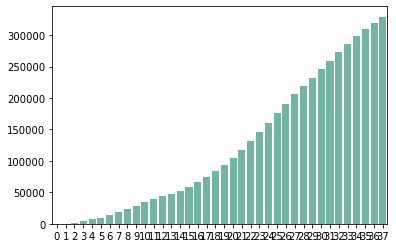

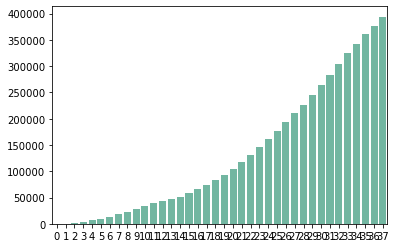

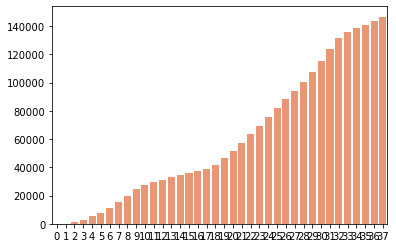

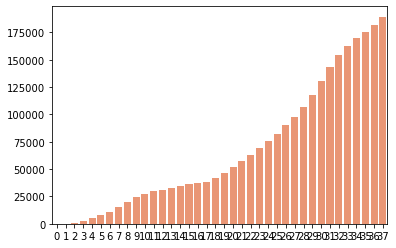

In [10]:
infection = np.sum(np.cumsum(new_infected_regions_infection[:,:,:],axis=1)[:,:,:],axis=2)
oldest_first = np.sum(np.cumsum(new_infected_regions[:,:,:],axis=1)[:,:,:], axis=2)
for i in range(len(indices)):
    plt.figure()
    sns.barplot(np.arange(nr_weeks),infection[i,:], color=colors[i])
    plt.show()
    plt.figure()
    sns.barplot(np.arange(nr_weeks), oldest_first[i,:], color=colors[i])
    plt.show()
    print();print();print();print()
    


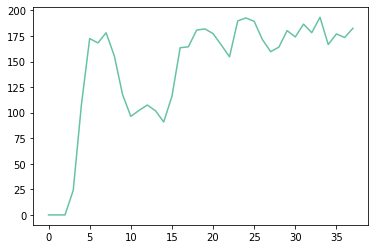

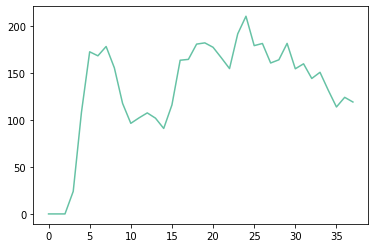

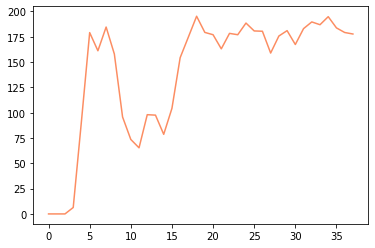

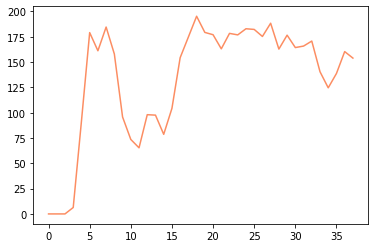

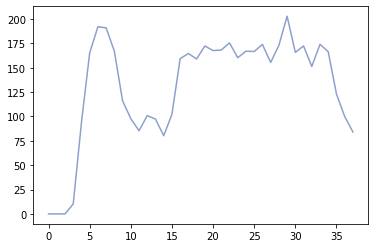

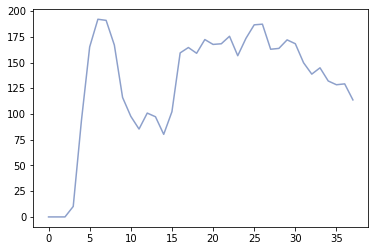

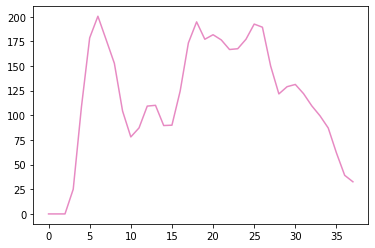

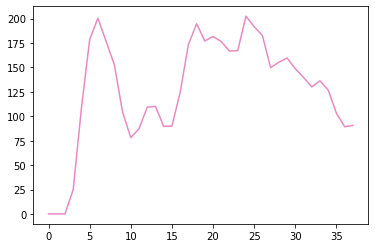

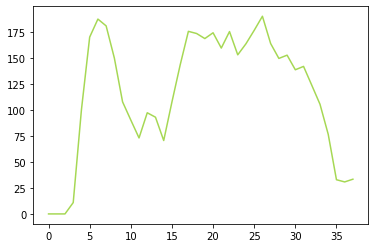

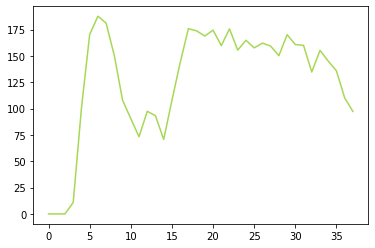

In [11]:
n=5
inf_array = np.cumsum(new_infected_regions_infection[70,:,:],axis=0)[-1,:]
array = np.cumsum(new_infected_regions[70,:,:],axis=0)[-1,:]

idx_infection = np.argpartition(inf_array, -n)[-n:]
idx = np.argpartition(array, -n)[-n:]

indices_infection = idx_infection[np.argsort((-inf_array)[idx_infection])]
indices = idx[np.argsort((-array)[idx])]

for i in range(len(indices)):
    plt.figure()
    sns.lineplot(np.arange(nr_weeks),new_infected_regions_infection[70,:,indices[i]], color=colors[i])
    plt.show()
    plt.figure()
    sns.lineplot(np.arange(nr_weeks), new_infected_regions[70,:,indices[i]], color=colors[i])
    plt.show()
    print();print();print();print()
    



In [12]:
indices

array([  2, 279,   4,   3,  21])

In [13]:
np.where(2 ==indices)[0][0]

0

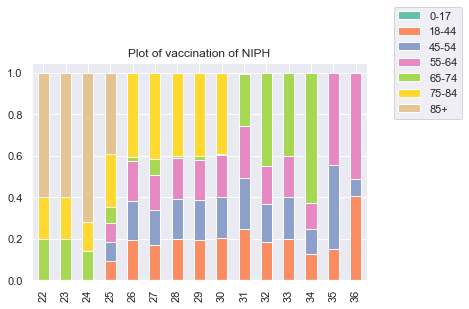

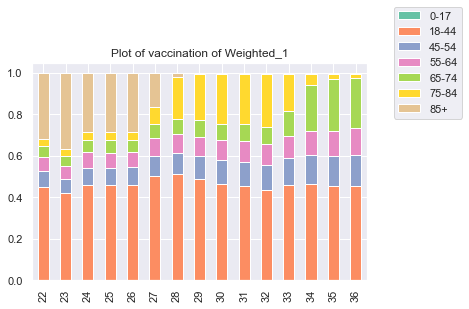

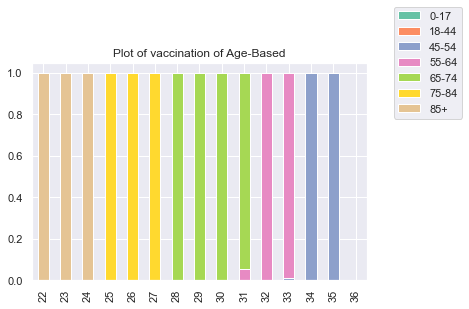

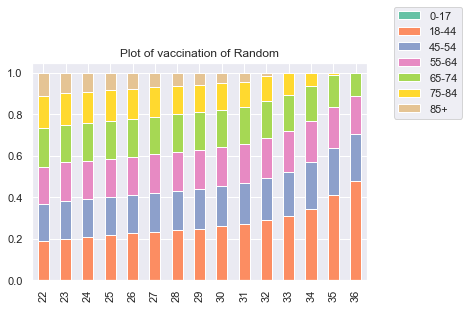

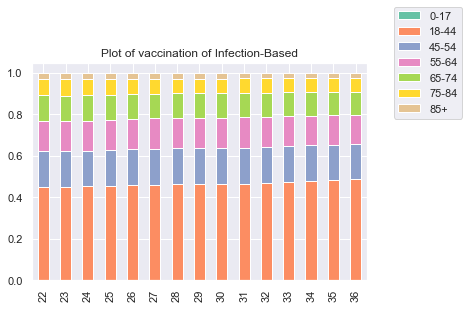

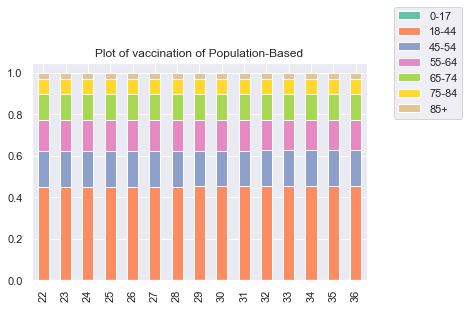

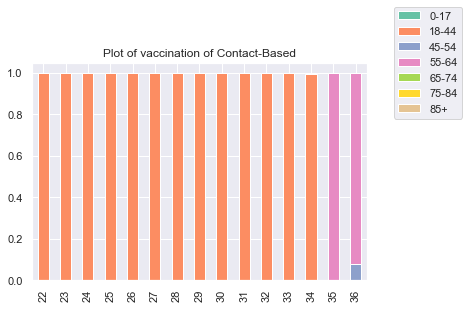

In [14]:
paths = get_paths()
keys = list(results.keys())
for i in range(len(keys)):
    age_labels = results[keys[i]][0]
    vaccinated_age_groups = results[keys[i]][-2]
    vaccinated_age_groups = np.diff(vaccinated_age_groups, axis=1)
    vaccinated_mean = vaccinated_age_groups.mean(axis=0)
    week_cut = np.where(vaccinated_mean > 0)[0][0]
    norm = np.where(np.int64(vaccinated_mean.sum(axis=1, keepdims=True))==0, 1, vaccinated_mean.sum(axis=1, keepdims=True))
    vaccinated_mean[week_cut:].sum(axis=1)
    vaccinated_proportions = np.divide(vaccinated_mean, norm)
    vaccinated_proportions[week_cut:].sum(axis=1)
    vaccinated_cumsum = vaccinated_mean.cumsum(axis=1)
    weeks = np.arange(vaccinated_proportions.shape[0])
    df = pd.DataFrame(columns=age_labels, data=vaccinated_proportions[week_cut:], index=weeks[week_cut:])
    sns.set()
    df.plot(kind='bar', stacked=True, color=colors)
    plt.title(f"Plot of vaccination of {keys[i]}")
    plt.legend(loc='right', bbox_to_anchor=(1.3, 1), ncol=1, fancybox=True)
    plt.savefig(f"../plots/vaccination/{keys[i]}_vaccination_by_age.png", dpi=200)

## Analysis of simulations needed

In [15]:
nr_sim = results[list(results.keys())[0]][4].shape[0]
objective_values = {}
for keys in results.keys():
    objective_values[keys] = np.zeros((nr_sim,5)) #axis 1: index 0: deaths, 1: infected, 2: yll, 3: vaccinated, 4: weighted


In [16]:
paths = utils.create_named_tuple('paths', 'filepaths.txt')
config = utils.create_named_tuple('config', paths.config)

for key in list(results.keys()):
    print("Finding objective values for ", key)
    result = results[key]
    age_labels = result[0]
    
    new_deaths_age_groups = result[-3]
    cumulative_deaths = new_deaths_age_groups.cumsum(axis=1)
    cum_deaths = np.zeros((cumulative_deaths.shape[0], cumulative_deaths.shape[2]))
    yll = np.zeros((cumulative_deaths.shape[0]))
    for i in range(cumulative_deaths.shape[0]):
        cum_deaths[i] = cumulative_deaths[i,-1,:]
        yll[i] = utils.calculate_yll(utils.get_expected_yll(config.age_bins, age_labels),  cum_deaths[i]) 
    deaths = np.sum(cum_deaths, axis=1)

    new_infected_age_groups = result[-4]
    cumulative_infected = new_infected_age_groups.cumsum(axis=1)
    infected = np.zeros((cumulative_infected.shape[0]))
    for i in range(cumulative_infected.shape[0]):
        infected[i] = np.sum(cumulative_infected[i,-1,:])

    vaccinated_age_groups = result[-2]
    vaccinated = np.zeros((vaccinated_age_groups.shape[0]))
    for i in range(vaccinated_age_groups.shape[0]):
        vaccinated[i] = np.sum(vaccinated_age_groups[i,-1,:])

    weighted = np.zeros((cumulative_infected.shape[0]))
    for i in range(cumulative_deaths.shape[0]):
        weighted[i] = 0.01*infected[i] + deaths[i]
        

    objective_values[key][:,0] = deaths
    objective_values[key][:,1] = infected
    objective_values[key][:,2] = yll
    objective_values[key][:,3] = vaccinated
    objective_values[key][:,4] = weighted

Finding objective values for  NIPH
Finding objective values for  Weighted_1
Finding objective values for  Age-Based
Finding objective values for  Random
Finding objective values for  Infection-Based
Finding objective values for  Population-Based
Finding objective values for  Contact-Based


In [17]:
colors = sns.color_palette("Set2")
def density_plot(values, key, color):
    # Draw the density plot
    plot = sns.distplot(values, hist=False, kde=True,
                 kde_kws={'linewidth': 1.5},
                 label=key, color=color)
    plot.set(yticklabels=[])
    plot.set(xlabel=None, ylabel=None)

In [18]:
len(keys)

13

Deaths

Infected

YLL

Weighted



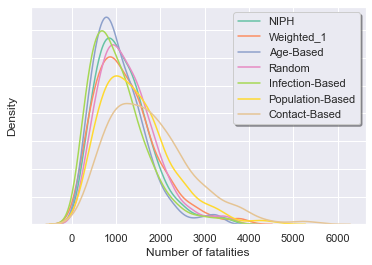

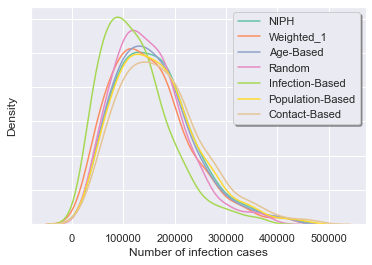

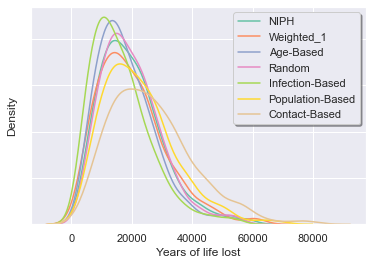

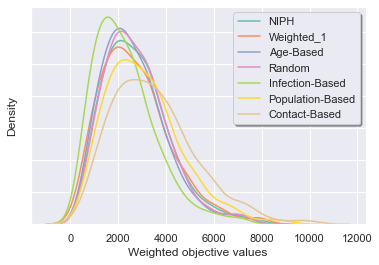

In [19]:
keys = list(results.keys())
print("Deaths")
print()
plt.figure()
for n in range(len(keys)):
    density_plot(objective_values[keys[n]][:,0], keys[n], colors[n])
plt.legend(loc='upper right', ncol=1, fancybox=True, shadow=True)
plt.xlabel('Number of fatalities')
plt.ylabel("Density")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig("../plots/computational_study/fatalities_distributions.png", dpi=200)

print("Infected")
print()
plt.figure()
for n in range(len(keys)): 
    density_plot(objective_values[keys[n]][:,1], keys[n], colors[n])
plt.legend(loc='upper right', ncol=1, fancybox=True, shadow=True)
plt.xlabel('Number of infection cases')
plt.ylabel("Density")
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.savefig("../plots/computational_study/infected_distributions.png", dpi=200)


print("YLL")
print()
plt.figure()
    #if i==0: j, k = 0,0
    #elif i==1: j, k = 0,1
    #elif i==2: j, k = 1,0
    #elif i==3: j, k = 1,1
for n in range(len(keys)): 
    density_plot(objective_values[keys[n]][:,2], keys[n], colors[n])
plt.legend(loc='upper right', ncol=1, fancybox=True, shadow=True)
plt.xlabel('Years of life lost')
plt.ylabel("Density")
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.savefig("../plots/computational_study/yll_distributions.png", dpi=200)

print("Weighted")
print()
plt.figure()
for n in range(len(keys)): 
    density_plot(objective_values[keys[n]][:,4], keys[n], colors[n])
plt.legend(loc='upper right', ncol=1, fancybox=True, shadow=True)
plt.xlabel('Weighted objective values')
plt.ylabel("Density")
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.savefig("../plots/computational_study/weighted_distributions.png", dpi=200)



## T-test of observations

In [20]:
def t_test(first, second):
        """ Performs one-sided t-test to check to variables for significant difference

        Args:
            first (Individual): presumed best individual
            second (Individual): presumed worse individual
            significance (float, optional): level of significance to test against. Defaults to 0.1.

        Returns:
            bool: True if significance is achieved
        """
        if not (first==second).all():
            z = first - second
            return scipy.stats.ttest_ind(z, np.zeros(len(first)), alternative="less").pvalue
        return 1

In [21]:
dead = dict(map(lambda x: (x[0], np.array(x[1])[:,0]), objective_values.items()))
infected = dict(map(lambda x: (x[0], np.array(x[1])[:,1]), objective_values.items()))
yll = dict(map(lambda x: (x[0], np.array(x[1])[:,2]), objective_values.items()))
vaccinated = dict(map(lambda x: (x[0], np.array(x[1])[:,3]), objective_values.items()))
weighted = dict(map(lambda x: (x[0], np.array(x[1])[:,0] + 0.01*np.array(x[1])[:,1]), objective_values.items()))

mean_dead = dict(map(lambda x: (x[0], np.mean(np.array(x[1])[:,0])), objective_values.items()))
mean_infected = dict(map(lambda x: (x[0], np.mean(np.array(x[1])[:,1])), objective_values.items()))
mean_yll = dict(map(lambda x: (x[0], np.mean(np.array(x[1])[:,2])), objective_values.items()))
mean_vaccinated = dict(map(lambda x: (x[0], np.mean(np.array(x[1])[:,3])), objective_values.items()))
mean_weighted = dict(map(lambda x: (x[0], np.mean(np.array(x[1])[:,0] + 0.01*np.array(x[1])[:,1])), objective_values.items()))

sorted_dead = dict(sorted(mean_dead.items(), key=lambda x: x[1]))
sorted_infected = dict(sorted(mean_infected.items(), key=lambda x: x[1]))
sorted_yll = dict(sorted(mean_yll.items(), key=lambda x: x[1]))
sorted_vaccinated = dict(sorted(mean_vaccinated.items(), key=lambda x: x[1]))
sorted_weighted = dict(sorted(mean_weighted.items(), key=lambda x: x[1]))
 
std_dead = dict(map(lambda x: (x[0], np.std(np.array(x[1])[:,0])), objective_values.items()))
std_infected = dict(map(lambda x: (x[0], np.std(np.array(x[1])[:,1])), objective_values.items()))
std_yll = dict(map(lambda x: (x[0], np.std(np.array(x[1])[:,2])), objective_values.items()))
std_vaccinated = dict(map(lambda x: (x[0], np.std(np.array(x[1])[:,3])), objective_values.items()))
std_weighted = dict(map(lambda x: (x[0], np.std(np.array(x[1])[:,0] + 0.01*np.array(x[1])[:,1])), objective_values.items()))


In [22]:
results[key][6][np.argsort(-infected[key])[2]][:,1]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.16021353,   3.81971985,
         8.6536491 ,  11.85384983,  16.59157425,  18.27322672,
        13.04826303,  69.81210324, 167.77016663, 188.33334135,
       179.64857429, 193.18868943, 175.11181891, 158.62455127,
       166.89041478, 173.54960963, 165.71053007, 182.67966483,
       182.73125872, 177.24585842, 161.91924662, 177.4511128 ,
       162.19593169, 136.20908473,  99.87250684, 103.95132408,
        73.14494179,  68.59136908])

In [23]:
np.max(np.diff(results[key][8][np.argsort(-infected[key])[2]]))

125564.23878397042

In [32]:
key = "Infection-Based"
key2 = "Contact-Based"

for r in np.arange(nr_regions)[40:50]:
    print("0")
    f, (ax1, ax2) = plt.subplots(2,1)
    max_vaccine = np.max(np.diff(results[key][8][np.argsort(-infected[key])[2],:,r]))
    max_infected = np.max(results[key][6][np.argsort(-infected[key])[2],:,r])
    print("1")
    ax1.set_title(key + f" region {r}")
    ax2.set_title(key2 + f" region {r}")
    sns.barplot(np.arange(nr_weeks), np.diff(results[key][8][np.argsort(-infected[key])[2],:,r], prepend=0), label="vaccinated", ax=ax1, color=colors[2])
    ax1.set_yticks(np.arange(max_vaccine))
    ax1.set_xticks(np.arange(nr_weeks)[::4])
    print("2")
    ax1_2 = ax1.twinx()
    ax1_2.set_yticks(np.arange(max_infected))
    sns.lineplot(np.arange(nr_weeks), results[key][6][np.argsort(-infected[key])[2],:,r], label="infected", ax=ax1_2, color=colors[1])
    sns.barplot(np.arange(nr_weeks), np.diff(results[key2][8][np.argsort(-infected[key])[2],:,r], prepend=0), label="vaccinated", ax=ax2, color=colors[2])
    print("3")
    ax2.set_yticks(np.arange(max_vaccine))
    ax2.set_xticks(np.arange(nr_weeks)[::4])
    ax2_2 = ax2.twinx()
    ax2_2.set_yticks(np.arange(max_infected))
    print("4")
    sns.lineplot(np.arange(nr_weeks), results[key2][6][np.argsort(-infected[key])[2],:,r], label="infected", ax=ax2_2, color=colors[1])
    plt.show()

1


KeyboardInterrupt: 

In [119]:
new_deaths_age_groups = results["Infection-Based"][-5]
vaccinated_age_groups = results["Infection-Based"][-2]
vaccinated_country = np.sum(np.diff(vaccinated_age_groups, axis=1), axis=2)
new_deaths_country = np.sum(new_deaths_age_groups, axis=2)
print(np.where(vaccinated_country[:,22:] < 1)[0])

for index in np.unique(np.where(vaccinated_country[:,22:] < 1)[0]):
    print()
    print(np.where(vaccinated_country[index,22:] <1))
    print(new_deaths_country[index,22:])


[ 15  17  96  96  96 114 119 119 120 120 126 126 126 126 126 132 132 132
 132 132 143 150 150 150 150 150 183 183 183 183 183 183 183 200 212 217
 217 217 217 225 225 225 225 225 274 274 274 314 326 349 388 388 388 409
 409 409 409 409 424 424 424 478]

(array([14]),)
[571.6982652  505.10057953 367.2453393  279.7997159  222.50577586
 186.61552031 149.82029314 103.29058386  54.20878719  61.55153177
  61.52132579  69.24106867  78.21446103  50.6545415   33.66814113
  17.34531782]

(array([14]),)
[605.10228956 704.58729948 735.13674156 525.7471031  386.02059403
 259.7257912  163.95992796 123.04154817 101.30032803  96.46692391
 122.11800488 168.45750116 131.3013206   92.39128596  54.68639232
  30.51446565]

(array([12, 13, 14]),)
[318.65222251 356.66391587 358.34660284 358.09275968 420.48733839
 321.58424959 184.5938057  119.42708787  71.09682534  44.04043275
  29.66935173  24.75592384  26.65232858  32.03178281  19.80815053
   6.81141113]

(array([14]),)
[379.08861701 547.4171521  464.56186

In [110]:
print(np.min(np.where(vaccinated_country[183,22:]<1)))
np.sum(new_deaths_age_groups[183,22:],axis=1)

8


array([1.15793883e+00, 3.28977326e+00, 4.22640861e+00, 2.96328916e+00,
       1.78297715e+00, 7.82596902e-01, 2.73049134e-01, 9.29380318e-02,
       6.31801714e-02, 2.99997619e-02, 5.68818642e-02, 3.61956480e-02,
       3.19621323e-02, 4.09943679e-03, 4.34231637e-04, 3.43549147e-05])

Text(0, 0.5, 'Years of life lost')

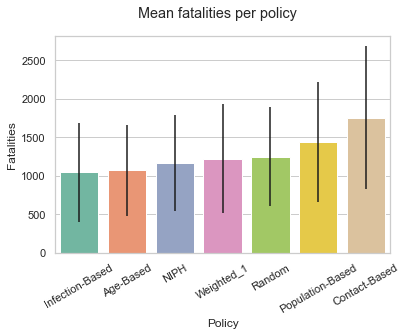

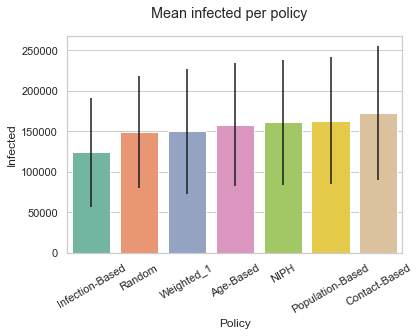

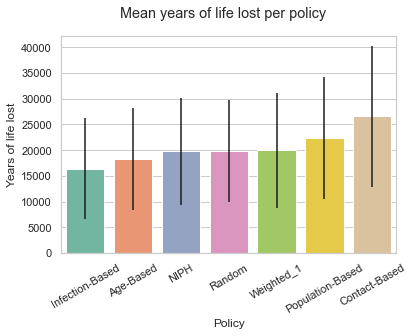

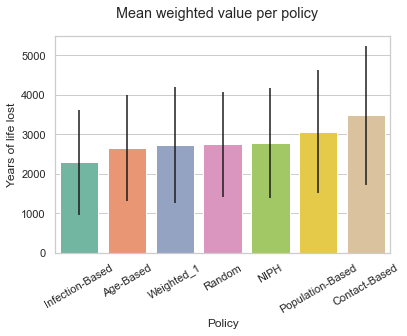

In [16]:
sns.set_theme(style="whitegrid")
keys=list(sorted_dead.keys())
plt.figure()
y=[]
yerr=[]
for key in keys:
    y.append(sorted_dead[key])
    yerr.append(std_dead[key])
sns.barplot(x=keys, y=y, yerr=yerr, palette=colors)
plt.suptitle("Mean fatalities per policy")
plt.xticks(rotation=30)
plt.xlabel("Policy")
plt.ylabel("Fatalities")

keys=list(sorted_infected.keys())
plt.figure()
y=[]
yerr=[]
for key in keys:
    y.append(sorted_infected[key])
    yerr.append(std_infected[key])
sns.barplot(x=keys, y=y, yerr=yerr, palette=colors)

plt.suptitle("Mean infected per policy")
plt.xticks(rotation=30)
plt.xlabel("Policy")
plt.ylabel("Infected")

keys=list(sorted_yll.keys())
plt.figure()
y=[]
yerr=[]
for key in keys:
    y.append(sorted_yll[key])
    yerr.append(std_yll[key])
sns.barplot(x=keys, y=y, yerr=yerr, palette=colors)

plt.suptitle("Mean years of life lost per policy")
plt.xticks(rotation=30)
plt.xlabel("Policy")
plt.ylabel("Years of life lost")


keys=list(sorted_weighted.keys())
plt.figure()
y=[]
yerr=[]
for key in keys:
    y.append(sorted_weighted[key])
    yerr.append(std_weighted[key])
sns.barplot(x=keys, y=y, yerr=yerr, palette=colors)

plt.suptitle("Mean weighted value per policy")
plt.xticks(rotation=30)
plt.xlabel("Policy")
plt.ylabel("Years of life lost")


In [25]:
print()
print("Dead")

for key in ['Population-Based', "Infection-Based", "Age-Based", "Contact-Based", "NIPH", "Random"]:
    print(f"{key:>20} {mean_dead[key]:>8,.0f} {std_dead[key]:>8,.0f} {std_dead[key]/mean_dead[key]:>8,.2f}")
print()
print()
print("Infected")
for key in ['Population-Based', "Infection-Based", "Age-Based", "Contact-Based", "NIPH", "Random"]:
    print(f"{key:>20} {mean_infected[key]:>8,.0f} {std_infected[key]:>8,.0f} {std_infected[key]/mean_infected[key]:>8,.2f}")
print()
print()
print("YLL")
for key in ['Population-Based', "Infection-Based", "Age-Based", "Contact-Based", "NIPH", "Random"]:
    print(f"{key:>20} {mean_yll[key]:>8,.0f} {std_yll[key]:>8,.0f} {std_yll[key]/mean_yll[key]:>8,.2f}")
print()
print()
print("Vaccinated")
for key in ['Population-Based', "Infection-Based", "Age-Based", "Contact-Based", "NIPH", "Random"]:
    print(f"{key:>20} {mean_vaccinated[key]:>8,.0f} {std_vaccinated[key]:>8,.0f} {std_vaccinated[key]/mean_vaccinated[key]:>8,.2f}")

print()
print()
print("Weighted")
for key in ['Population-Based', "Infection-Based", "Age-Based", "Contact-Based", "NIPH", "Random"]:
    print(f"{key:>20} {mean_weighted[key]:>8,.0f} {std_weighted[key]:>8,.0f} {std_weighted[key]/mean_weighted[key]:>8,.2f}")


Dead
    Population-Based    1,437      777     0.54
     Infection-Based    1,049      641     0.61
           Age-Based    1,072      594     0.55
       Contact-Based    1,756      929     0.53
                NIPH    1,168      624     0.53
              Random    1,248      641     0.51


Infected
    Population-Based  163,190   78,488     0.48
     Infection-Based  123,966   67,563     0.55
           Age-Based  158,165   75,720     0.48
       Contact-Based  172,625   82,568     0.48
                NIPH  160,951   76,535     0.48
              Random  149,528   69,053     0.46


YLL
    Population-Based   22,404   11,839     0.53
     Infection-Based   16,402    9,860     0.60
           Age-Based   18,250    9,866     0.54
       Contact-Based   26,540   13,697     0.52
                NIPH   19,786   10,358     0.52
              Random   19,809    9,954     0.50


Vaccinated
    Population-Based 2,441,764        0     0.00
     Infection-Based 1,964,830  298,322     0.15
  

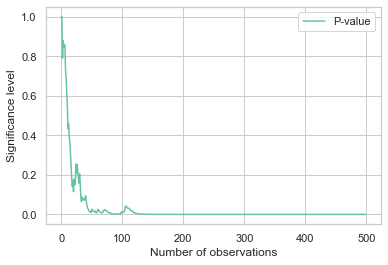

In [19]:
objective_value_best = objective_values[list(sorted_dead.keys())[3]][:,0]
objective_value_second_best = objective_values[list(sorted_dead.keys())[4]][:,0]
p_values = np.zeros(len(objective_value_best))
observations = np.arange(len(objective_value_best))
for i in range(len(objective_value_best)-1):
    p_values[i] = t_test(objective_value_best[:i], objective_value_second_best[:i])
p_values[np.isnan(p_values)] = 1

sns.set()
sns.set_style("whitegrid")
sns.lineplot(observations, p_values, label="P-value", color=colors[0])
plt.xlabel("Number of observations")
plt.ylabel("Significance level")
plt.savefig("../plots/computational_study/fatalities_significance.png", dpi=200)

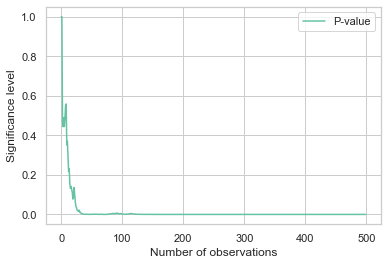

In [20]:
objective_value_best = objective_values[list(sorted_infected.keys())[4]][:,1]
objective_value_second_best = objective_values[list(sorted_infected.keys())[5]][:,1]

p_values = np.zeros(len(objective_value_best))
observations = np.arange(len(objective_value_best))
for i in range(len(objective_value_best)-1):
    p_values[i] = t_test(objective_value_best[:i], objective_value_second_best[:i])
p_values[np.isnan(p_values)] = 1

sns.set()
sns.set_style("whitegrid")
sns.lineplot(observations, p_values, label="P-value", color=colors[0])
plt.xlabel("Number of observations")
plt.ylabel("Significance level")
plt.savefig("../plots/computational_study/infected_significance.png", dpi=200)

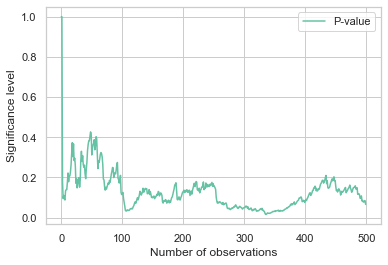

In [21]:
objective_value_best = objective_values[list(sorted_yll.keys())[3]][:,2]
objective_value_second_best = objective_values[list(sorted_yll.keys())[4]][:,2]
p_values = np.zeros(len(objective_value_best))
observations = np.arange(len(objective_value_best))
for i in range(len(objective_value_best)):
    p_values[i] = t_test(objective_value_best[:i], objective_value_second_best[:i])
p_values[np.isnan(p_values)] = 1

sns.set()
sns.set_style("whitegrid")
sns.lineplot(observations, p_values, label="P-value", color=colors[0])
plt.xlabel("Number of observations")
plt.ylabel("Significance level")
plt.savefig("../plots/computational_study/yll_significance.png", dpi=200)

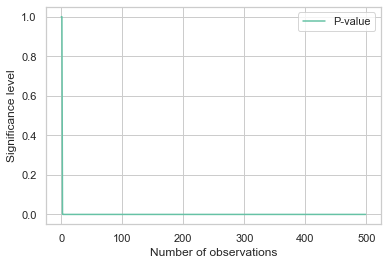

In [26]:
objective_value_best = objective_values[list(sorted_weighted.keys())[0]][:,4]
objective_value_second_best = objective_values[list(sorted_weighted.keys())[1]][:,4]
p_values = np.zeros(len(objective_value_best))
observations = np.arange(len(objective_value_best))
for i in range(len(objective_value_best)-1):
    p_values[i] = t_test(objective_value_best[:i], objective_value_second_best[:i])
p_values[np.isnan(p_values)] = 1

sns.set()
sns.set_style("whitegrid")
sns.lineplot(observations, p_values, label="P-value", color=colors[0])
plt.xlabel("Number of observations")
plt.ylabel("Significance level")
plt.savefig("../plots/computational_study/weighted_significance.png", dpi=200)

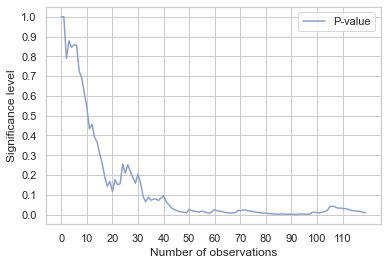

In [27]:
objective_value_best = objective_values[list(sorted_dead.keys())[3]][:,0]
objective_value_second_best = objective_values[list(sorted_dead.keys())[4]][:,0]

p_values = np.zeros(len(objective_value_best))
observations = np.arange(len(objective_value_best))
for i in range(len(objective_value_best)-1):
    p_values[i] = t_test(objective_value_best[:i], objective_value_second_best[:i])
p_values[np.isnan(p_values)] = 1

sns.set()
sns.set_style("whitegrid")
sns.lineplot(observations[:120], p_values[:120], label="P-value", color=colors[2])
plt.xticks(observations[0:111:10])
plt.yticks([0.1*i for i in range(11)])
plt.xlabel("Number of observations")
plt.ylabel("Significance level")
plt.savefig("../plots/computational_study/fatalities_significance_narrowed.png", dpi=200)

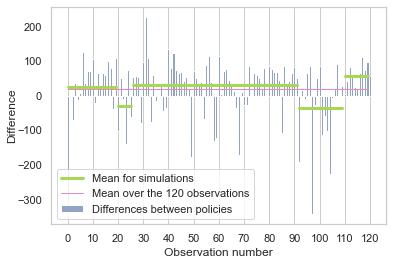

In [28]:

observations = np.arange(len(objective_value_best))
diffs = np.arange(len(objective_value_best))
for i in range( len(objective_value_best)-1):
   diffs[i] = objective_value_second_best[i] - objective_value_best[i]

l1 = 20  #limit 1
l2 = 26  #limit 2
l3 = 92  #limit 3
l4 = 110  #limit 4
l5 = 120  #limit 5

sns.set()
sns.set_style("whitegrid")
ax = sns.barplot(observations[:l5+1], diffs[:l5+1], label = "Differences between policies", color=colors[2], dodge=False)
sns.lineplot(observations[:l1], np.mean(diffs[:l1]), label = "Mean for simulations", linewidth=3, color=colors[4], ax=ax)
sns.lineplot(observations[l1:l2], np.mean(diffs[l1:l2]), linewidth=3, color=colors[4], ax=ax)
sns.lineplot(observations[l2:l3], np.mean(diffs[l2:l3]), linewidth=3, color=colors[4], ax=ax)
sns.lineplot(observations[l3:l4], np.mean(diffs[l3:l4]), linewidth=3, color=colors[4], ax=ax)
sns.lineplot(observations[l4:l5], np.mean(diffs[l4:l5]), linewidth=3, color=colors[4], ax=ax)
sns.lineplot(observations[:l5], np.mean(diffs[:l5]), label = f"Mean over the {l5} observations", linewidth=1, color=colors[3], ax=ax)
plt.xticks(observations[:l5+1:10])
plt.xlabel("Observation number")
plt.grid()
ax.set_ylabel("Difference", labelpad=0)
plt.savefig("../plots/computational_study/fatalities_diffs.png", dpi=200)

In [29]:
print(np.mean(diffs[:l1]))
print(np.mean(diffs[l1:l2]))
print(np.mean(diffs[l2:l3]))
print(np.mean(diffs[l3:l4]))
print(np.mean(diffs[:]))

25.45
-31.5
31.318181818181817
-35.77777777777778
24.964


In [30]:
print(diffs[:100])

[-304   -1  -70   36  -12    7  126   36   72   71  105  -23   65   25
   65   60  100   79  -38  110 -102   51  -11 -139   75  -63   54   56
   54  -79   96  228  108  -78   59  -17   -4   29  -45  -36  134   80
  123   74   64   68   42   53   19 -177   72   50   27   40  -67   89
  113   38 -131 -123  114    3   70   76   44   29   14  -36 -173   11
  -26  -27   85    0   66   58   52   22   80   -4   86   78   68   69
   46 -107   85   29   43   65   83   51 -192   15  -11   64   86 -344
  -27   51]
